# 호우피해이력 전처리

In [1]:
# 단계 1: 폰트 설치
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd
from datetime import datetime as dt
import numpy as np
import os

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [2]:
df = pd.read_excel('/content/호우피해이력정보/강남구.xls')
df.drop(columns=['번호'], inplace=True)
df.head()

,일자,"침수면적(1,000㎡)",피해액(천원),총강수량(mm),기간(일),태풍,강수계속시간(시간),최다강수1H,일강수량(mm),누적 강수량(mm)-2일,누적 강수량(mm)-3일,최대풍속(m/s),평균기온(℃)
0,1998-07-31,711.8,800139,962.0,19,없음,15,7.0,27.0,27.0,27.0,4.3,25.3
1,1998-08-01,711.8,800139,962.0,19,없음,24,21.5,35.5,62.5,62.5,5.2,25.2
2,1998-08-02,711.8,800139,962.0,19,없음,1,11.0,11.0,46.5,73.5,2.7,27.3
3,1998-08-03,711.8,800139,962.0,19,없음,24,24.5,51.0,62.0,97.5,4.2,26.3
4,1998-08-04,711.8,800139,962.0,19,없음,24,52.5,143.0,194.0,205.0,3.6,25.7


In [3]:
df.describe()

,"침수면적(1,000㎡)",피해액(천원),총강수량(mm),기간(일),강수계속시간(시간),최다강수1H,일강수량(mm),누적 강수량(mm)-2일,누적 강수량(mm)-3일,최대풍속(m/s),평균기온(℃)
count,124.000000,1.240000e+02,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,148.037903,2.128274e+05,511.983871,11.451613,15.185484,15.943548,49.346774,93.588710,132.475806,4.087097,24.342742
std,272.925213,4.129671e+05,293.968549,6.901579,9.639322,18.981507,70.878207,100.972206,119.550851,1.391611,3.052899
min,0.900000,0.000000e+00,16.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.800000,2.600000
25%,3.300000,0.000000e+00,272.500000,5.000000,4.750000,0.875000,1.000000,11.500000,31.875000,3.175000,22.875000
50%,6.500000,4.800000e+03,465.500000,13.000000,20.000000,7.000000,17.500000,50.750000,99.000000,3.900000,24.750000
75%,91.900000,3.121760e+05,819.000000,19.000000,24.000000,28.500000,71.375000,148.875000,201.375000,4.525000,26.225000
max,721.000000,1.820741e+06,962.000000,21.000000,24.000000,72.000000,350.500000,438.500000,514.000000,10.900000,30.200000


In [4]:
df.dtypes

,0
일자,object
"침수면적(1,000㎡)",float64
피해액(천원),int64
총강수량(mm),float64
기간(일),int64
태풍,object
강수계속시간(시간),int64
최다강수1H,float64
일강수량(mm),float64
누적 강수량(mm)-2일,float64


In [5]:
# 일자 전처리하기
df['일자'].isna().sum()

np.int64(0)

In [6]:
df['일자'] = pd.to_datetime(df['일자'], format='%Y-%m-%d')

In [7]:
df['태풍'].unique()

array(['없음', '에위니아', '메아리'], dtype=object)

# 태풍 정보 처리하기
- 특정 사이트를 통해 크롤링하기.
- OPEN-API 이용하기.

### 크롤링
- 한글로 된 태풍명을 이용해서 풍속, 반경, 이동경로 등을 크롤링할 수 있는 사이트가 존재하지 않음.

- 기상청 기상자료개방포털 이용
  + https://data.kma.go.kr/data/typhoonData/typInfoTYList.do?pgmNo=689
  + 해당 사이트에서 selenium을 이용한 동적 크롤링을 이용하기에는 상세한 결과를 확인이 불가능.

### OPEN-API
- 기상청 기상자료개방포털 이용
  + 공공데이터포털: https://www.data.go.kr/data/15043570/fileData.do
  + 기상청 기상자료개방포털: https://data.kma.go.kr/data/typhoonData/typInfoTYList.do?pgmNo=689
  + 국가정보자원관리원 화재로 인한 것인지 해당 API 신청 및 이용 불가능.

### 결과
- 태풍에 대한 정보는 일단 label 인코딩으로 진행.

In [8]:
df['태풍'] = df['태풍'].apply(lambda x: 0 if x == '없음' else 1).astype(np.int64)

print(df['태풍'].value_counts())

태풍
0    122
1      2
Name: count, dtype: int64


In [9]:
df.dtypes

,0
일자,datetime64[ns]
"침수면적(1,000㎡)",float64
피해액(천원),int64
총강수량(mm),float64
기간(일),int64
태풍,int64
강수계속시간(시간),int64
최다강수1H,float64
일강수량(mm),float64
누적 강수량(mm)-2일,float64


In [10]:
df.head()

,일자,"침수면적(1,000㎡)",피해액(천원),총강수량(mm),기간(일),태풍,강수계속시간(시간),최다강수1H,일강수량(mm),누적 강수량(mm)-2일,누적 강수량(mm)-3일,최대풍속(m/s),평균기온(℃)
0,1998-07-31,711.8,800139,962.0,19,0,15,7.0,27.0,27.0,27.0,4.3,25.3
1,1998-08-01,711.8,800139,962.0,19,0,24,21.5,35.5,62.5,62.5,5.2,25.2
2,1998-08-02,711.8,800139,962.0,19,0,1,11.0,11.0,46.5,73.5,2.7,27.3
3,1998-08-03,711.8,800139,962.0,19,0,24,24.5,51.0,62.0,97.5,4.2,26.3
4,1998-08-04,711.8,800139,962.0,19,0,24,52.5,143.0,194.0,205.0,3.6,25.7


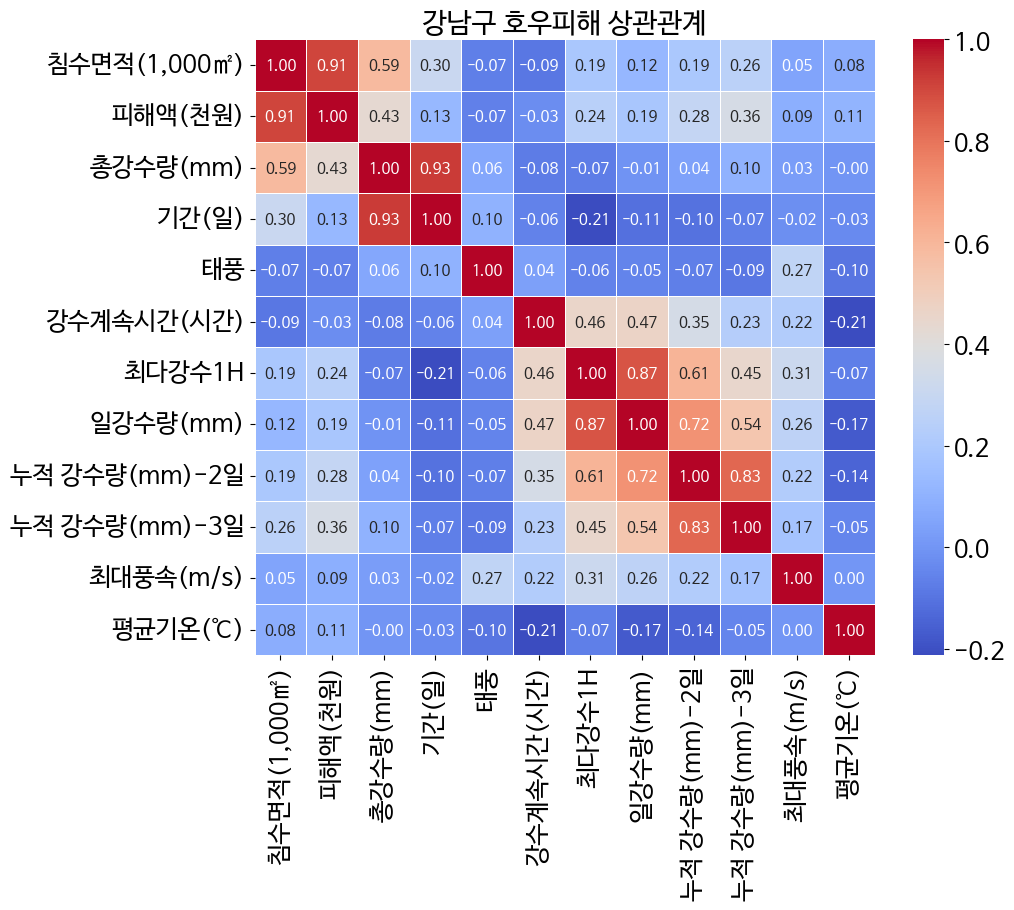

In [11]:
# 1. 상관계수 행렬 계산
correlation_matrix = df.corr(numeric_only=True)

# 3. 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=.5,
    cbar=True,
    annot_kws={"fontsize": 11}
)

plt.title('강남구 호우피해 상관관계', fontsize=20)
plt.show()

# 서울시 분석
- 각각의 행정구역 침수피해 데이터를 종합하여 분석진행예정.
- 연속된 날짜의 침수피해 기록이 있을 경우, 하나의 침수피해로 취급하여 튜플 하나로 종합예정.
  + 이에 따라 '일강수량(mm)', '누적 강수량(mm)-2일', '누적 강수량(mm)-3일', '강수계속시간(시간)' 컬럼은 드롭하여 처리.
  + 피해액은 피해면적과 다르게 변수가 많으므로 분석을 진행하지 않음.

In [12]:
# 이와 같은 형태로 처리하여 서울시 침수피해 데이터프레임 하나로 처리예정
df.drop(columns=['피해액(천원)', '일강수량(mm)', '누적 강수량(mm)-2일', '누적 강수량(mm)-3일', '강수계속시간(시간)'], inplace=True) # , '태풍'
df.head()

,일자,"침수면적(1,000㎡)",총강수량(mm),기간(일),태풍,최다강수1H,최대풍속(m/s),평균기온(℃)
0,1998-07-31,711.8,962.0,19,0,7.0,4.3,25.3
1,1998-08-01,711.8,962.0,19,0,21.5,5.2,25.2
2,1998-08-02,711.8,962.0,19,0,11.0,2.7,27.3
3,1998-08-03,711.8,962.0,19,0,24.5,4.2,26.3
4,1998-08-04,711.8,962.0,19,0,52.5,3.6,25.7


In [13]:
# 중간 날짜 구하는 함수
def get_middle_date(date_list):
    '''
    연속된 침수피해 날짜 중, 중간이 되는 날짜를 반환하는 함수
    '''
    if len(date_list) == 1:
        return date_list[0]
    sorted_dates = sorted(date_list)
    mid_idx = len(sorted_dates) // 2
    return sorted_dates[mid_idx]

In [14]:
class Seolsi:
  def __init__(self, file_path):
    name, extension = os.path.splitext(os.path.basename(file_path))
    self.name = name
    self.df = pd.read_excel(file_path)

    # 불필요한 컬럼 제거
    self.df.drop(columns=['번호', '피해액(천원)', '일강수량(mm)', '누적 강수량(mm)-2일', '누적 강수량(mm)-3일', '강수계속시간(시간)'], inplace=True) # '태풍'

    # 태풍 레이블인코딩 진행
    self.df['태풍'] = self.df['태풍'].apply(lambda x: 0 if x == '없음' else 1).astype(np.int64)

    # '일자' 컬럼을 datetime 형식으로 변환
    self.df['일자'] = pd.to_datetime(self.df['일자'], format='%Y-%m-%d')

    # 고유한 침수 이벤트를 식별하기 위한 그룹 키 정의 ('일자' 제외)
    event_group_keys = ['침수면적(1,000㎡)', '총강수량(mm)', '기간(일)']

    # 기타 수치 컬럼에 대한 집계 방식 정의
    agg_dict = {
        '태풍': 'mean',             # 평균
        '평균기온(℃)': 'mean',        # 평균
        '최다강수1H': 'max',        # 최댓값
        '최대풍속(m/s)': 'max',        # 최댓값
    }

    # ============================
    # 1) event_group_keys를 기준으로 수치형 특징 집계
    # ============================
    # '기간(일)'은 이미 event_group_keys에 포함되어 있으므로 agg_dict에 추가할 필요 없음.
    # 나머지 컬럼들은 모두 처리되므로, 컬럼을 순회하여 'first'를 추가하는 로직은 필요 없음.
    aggregated_features_df = self.df.groupby(event_group_keys).agg(agg_dict).reset_index()

    # ============================
    # 2) 중간 날짜를 계산하기 위해 '일자' 컬럼만 별도로 처리
    # ============================
    # event_group_keys를 기준으로 그룹화하고 모든 '일자'를 리스트로 수집
    date_processing_df = self.df.groupby(event_group_keys)['일자'].apply(list).reset_index()

    # 각 그룹의 '일자' 리스트에 대해 get_middle_date 함수 적용
    date_processing_df['일자'] = date_processing_df['일자'].apply(get_middle_date)

    # ============================
    # 3) 집계된 특징과 처리된 날짜를 병합
    # ============================
    self.df = pd.merge(aggregated_features_df, date_processing_df, on=event_group_keys)

    self.df['행정구역'] = self.name

  def __str__(self):
    return f"==={self.name}===\n{self.df.head()}\n========="

In [15]:
search_path = '/content/호우피해이력정보'
dfs = []

# 1. os.listdir()로 파일명/폴더명 리스트를 가져옵니다.
file_list = os.listdir(search_path)

# 2. 리스트를 for문으로 순회하며 전체 경로를 만듭니다.
for filename in file_list:
    # 전체 경로 생성 (디렉터리 경로 + 파일 이름)
    full_path = os.path.join(search_path, filename)

    # 3. 이것이 파일인지 확인하고 출력합니다.
    if not os.path.isfile(full_path):
        continue
    name, extension = os.path.splitext(filename)
    dfs.append(Seolsi(full_path))
    # print(full_path)

In [16]:
df_li = [d.df for d in dfs]

In [17]:
# ============================
#   모든 행정구역 df 합치기
# ============================
df = pd.concat(df_li, ignore_index=True)

print("합쳐진 DF 크기:", df.shape)
print(df.head())

합쳐진 DF 크기: (323, 9)
   침수면적(1,000㎡)  총강수량(mm)  기간(일)   태풍    평균기온(℃)  최다강수1H  최대풍속(m/s)  \
0           0.0       0.0     10  0.0        NaN     NaN        NaN   
1           0.0     331.5      7  0.0  22.357143    35.5        4.1   
2           0.4     284.5      5  0.0  24.280000    25.0        5.5   
3           1.8     410.5      8  0.0  23.600000    37.5        6.9   
4           4.8     306.5      4  0.0  23.200000    72.5        4.9   

          일자 행정구역  
0 2017-07-07  도봉구  
1 2016-07-04  도봉구  
2 2013-07-13  도봉구  
3 2002-08-08  도봉구  
4 2011-07-28  도봉구  


In [18]:
df.dtypes

,0
"침수면적(1,000㎡)",float64
총강수량(mm),float64
기간(일),int64
태풍,float64
평균기온(℃),float64
최다강수1H,float64
최대풍속(m/s),float64
일자,datetime64[ns]
행정구역,object


In [20]:
df['평균기온(℃)'] = df['평균기온(℃)'].astype(float).round(1)
df['태풍'] = df['태풍'].astype(float).round(1)

In [21]:
df['태풍'].unique()

array([0. , 0.1, 0.7, 0.3])

In [22]:
df = df[df['침수면적(1,000㎡)'] != 0]

In [23]:
df.head()

,"침수면적(1,000㎡)",총강수량(mm),기간(일),태풍,평균기온(℃),최다강수1H,최대풍속(m/s),일자,행정구역
2,0.4,284.5,5,0.0,24.3,25.0,5.5,2013-07-13,도봉구
3,1.8,410.5,8,0.0,23.6,37.5,6.9,2002-08-08,도봉구
4,4.8,306.5,4,0.0,23.2,72.5,4.9,2011-07-28,도봉구
5,7.1,340.0,5,0.0,23.6,39.0,5.7,2003-08-25,도봉구
6,15.0,764.5,13,0.0,25.0,46.5,9.1,1999-07-29,도봉구


In [24]:
# 데이터프레임 전체적인 확인

# NaN 갯수 확인
print(df.isna().sum())

# 튜플 갯수 확인
print(len(df))

침수면적(1,000㎡)    0
총강수량(mm)        0
기간(일)           0
태풍              0
평균기온(℃)         2
최다강수1H          2
최대풍속(m/s)       2
일자              0
행정구역            0
dtype: int64
320


In [25]:
# 튜플 수가 NaN의 수에 비해 많으므로 any 방식의 dropna 진행
df = df.dropna(how='any')
print(len(df))
df.head()

318


,"침수면적(1,000㎡)",총강수량(mm),기간(일),태풍,평균기온(℃),최다강수1H,최대풍속(m/s),일자,행정구역
2,0.4,284.5,5,0.0,24.3,25.0,5.5,2013-07-13,도봉구
3,1.8,410.5,8,0.0,23.6,37.5,6.9,2002-08-08,도봉구
4,4.8,306.5,4,0.0,23.2,72.5,4.9,2011-07-28,도봉구
5,7.1,340.0,5,0.0,23.6,39.0,5.7,2003-08-25,도봉구
6,15.0,764.5,13,0.0,25.0,46.5,9.1,1999-07-29,도봉구


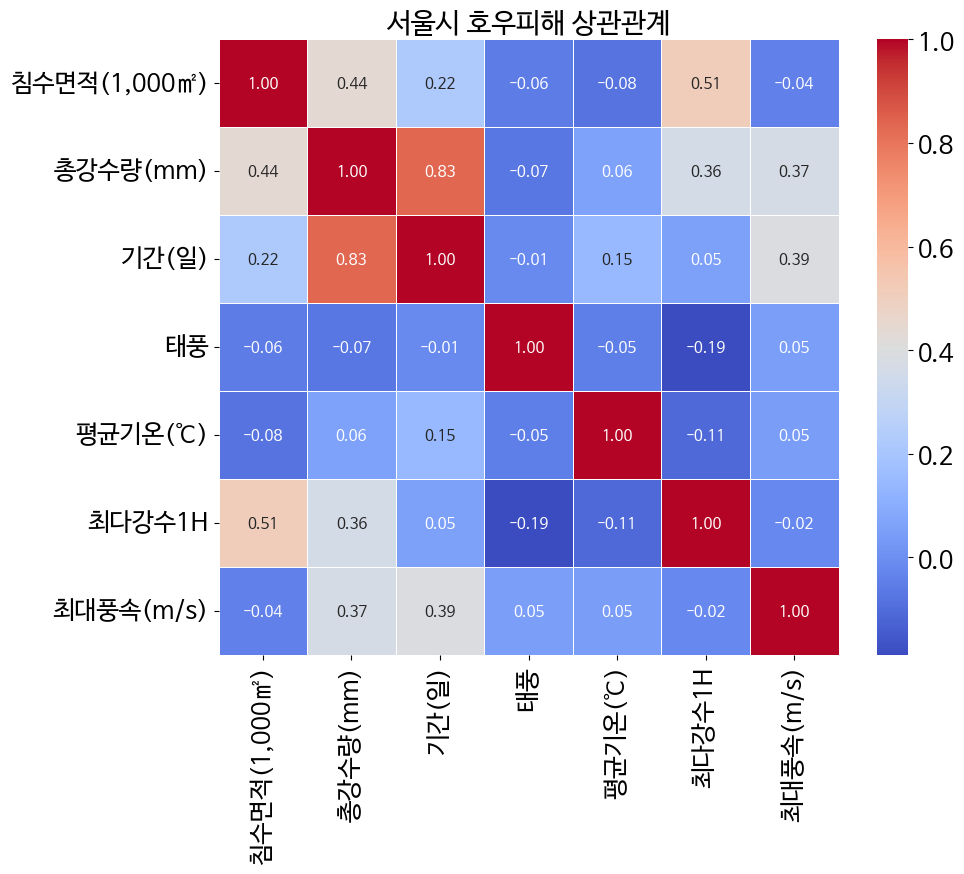

In [26]:
# 서울시 호우피해 상관관계

# 1. 상관계수 행렬 계산
correlation_matrix = df.corr(numeric_only=True)

# 3. 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=.5,
    cbar=True,
    annot_kws={"fontsize": 11}
)

plt.title('서울시 호우피해 상관관계', fontsize=20)
plt.show()

# 상관관계 분석
## 침수피해(침수면적(1,000㎡))
- 최다강수(최다강수1H)가 가장 높은 상관관계를 지니고 있습니다.
  + 빗물이 빠지는 것보다 내리는 강수량이 많이 때문으로 예상됩니다.
- 총 강수량이 그 다음으로 높은 상관관계입니다.
  + 최다강수량과 매우 큰 상관관계를 갖는 것이 아닌 것을 본다면 이는 서울이 타 도시에 비해서 포장도로의 비율이 높으며, 아스팔트는 흙과 비교했을 때, 투수율이 매우 낮기 때문에 이러한 이유로 최다강수량과는 별개의 결과를 낸 것으로 예상됩니다.
- 그 외에는 강우기간이 0.22의 상관관계를 가졌기는 하나, 이는 기간-총강수량의 상관관계가 0.83으로, 기간과의 직접적인 상관관계라기보다는 총강수량과의 상관관계로 발생한 결과로 예상됩니다.


In [27]:
df.head()

,"침수면적(1,000㎡)",총강수량(mm),기간(일),태풍,평균기온(℃),최다강수1H,최대풍속(m/s),일자,행정구역
2,0.4,284.5,5,0.0,24.3,25.0,5.5,2013-07-13,도봉구
3,1.8,410.5,8,0.0,23.6,37.5,6.9,2002-08-08,도봉구
4,4.8,306.5,4,0.0,23.2,72.5,4.9,2011-07-28,도봉구
5,7.1,340.0,5,0.0,23.6,39.0,5.7,2003-08-25,도봉구
6,15.0,764.5,13,0.0,25.0,46.5,9.1,1999-07-29,도봉구


In [28]:
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) # 폰트 설정

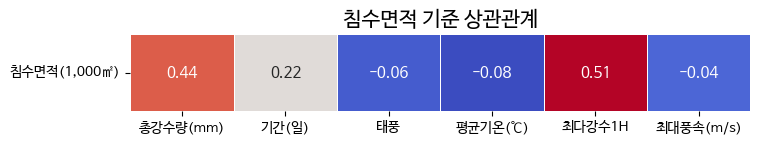

In [118]:
target_col = '침수면적(1,000㎡)'
corr_series = (
    df.corr(numeric_only=True)[target_col]
    .to_frame()          # Series → DataFrame
    .T                   # 가로 방향으로 전치
)

corr_series = corr_series.drop(columns=[target_col])

# plt.figure(figsize=(6, 8))
plt.figure(figsize=(8, 1))  # 👈 height 줄이기 (핵심)
sns.heatmap(
    corr_series,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    cbar=False,                # 👉 오른쪽 색상 띠 제거
    linewidths=.5,
    # cbar=True,
    annot_kws={"fontsize": 11}
)

# 🔹 컬럼(열) 텍스트 가로로
plt.xticks(rotation=0, ha='center')

# 🔹 행 텍스트도 가로로
plt.yticks(rotation=0)

plt.title('침수면적 기준 상관관계', fontsize=15)
plt.show()

# 행정구역 별 상관관계
- 배수시설, 포장도로의 비율, 지형 등 각 행정구역간의 차이로 인해 침수피해에 대한 상관관계가 다르게 나올 것으로 예상되어 행정구역별로 히트맵을 생성하였습니다.

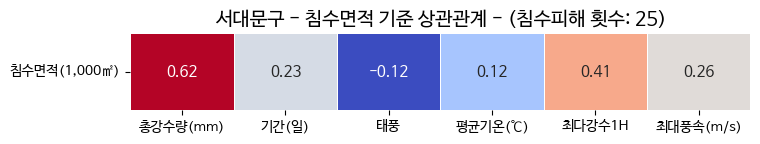

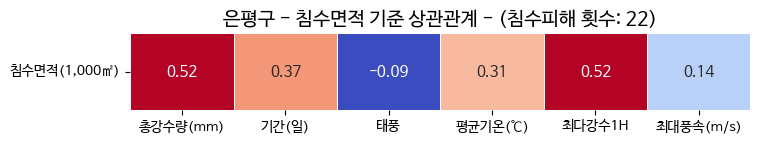

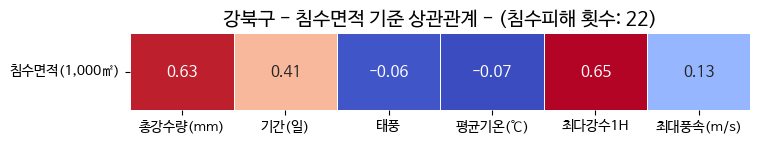

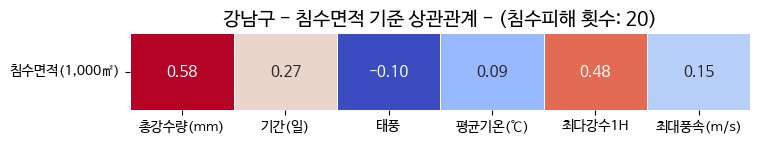

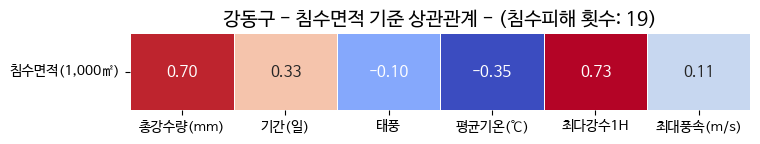

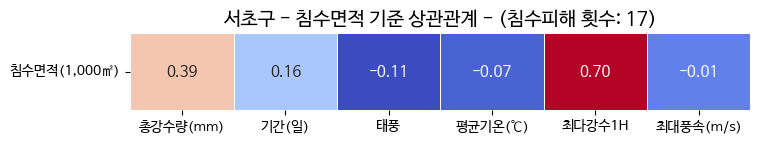

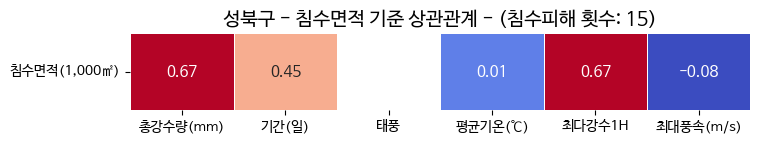

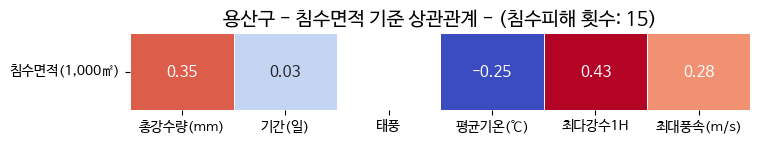

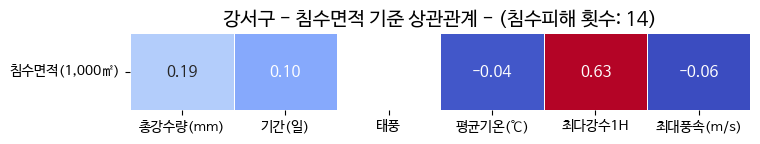

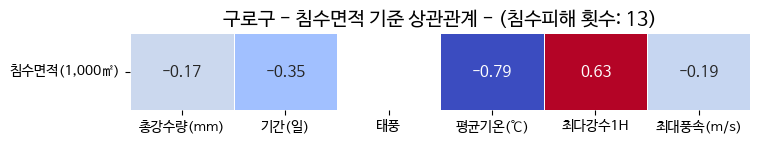

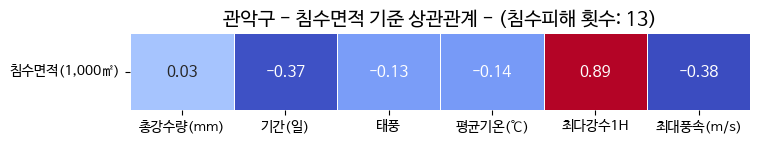

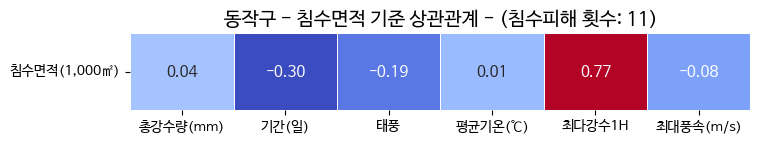

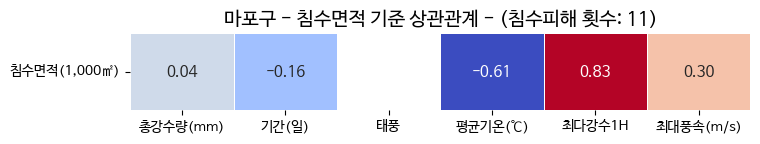

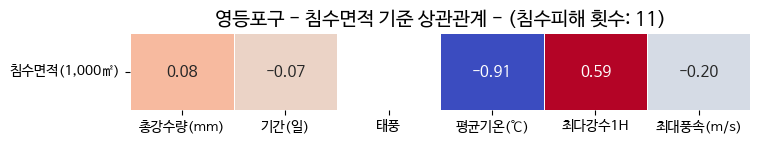

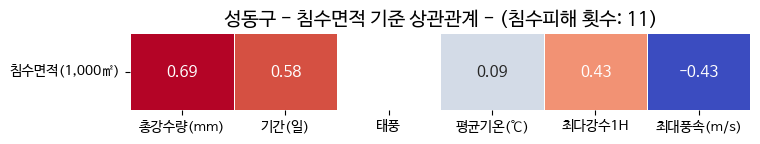

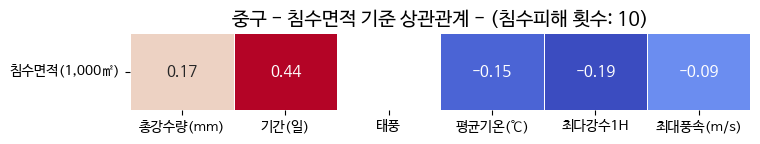

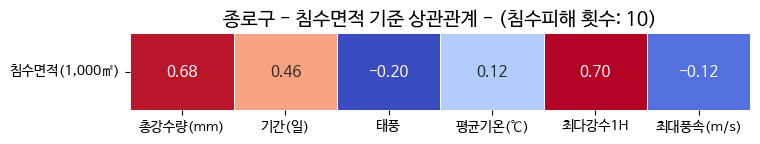

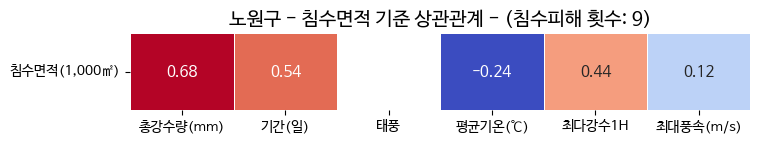

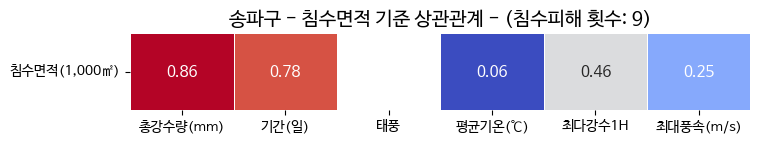

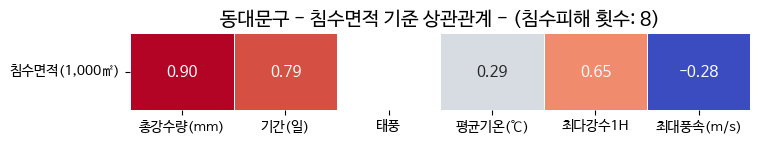

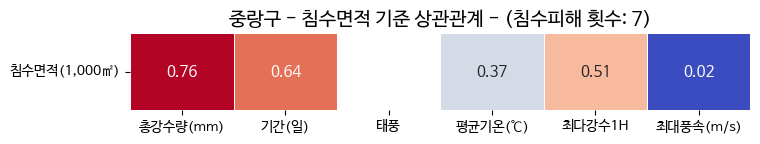

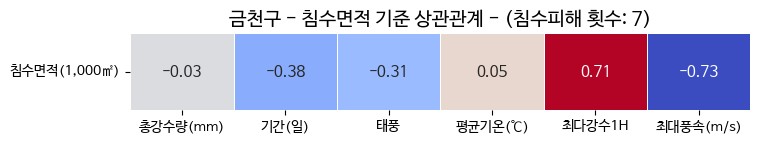

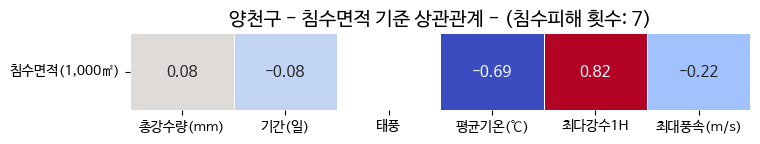

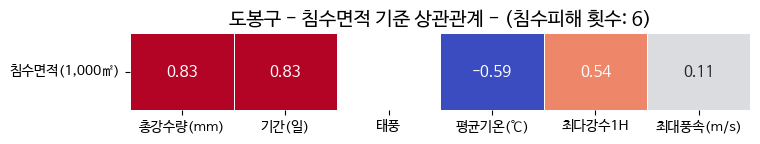

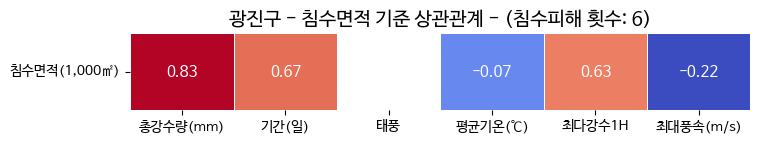

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

target_col = '침수면적(1,000㎡)'
region_col = '행정구역'

# =========================
# 1. 행정구역 one-hot 인코딩
# =========================
df_ohe = pd.get_dummies(df, columns=[region_col], prefix=region_col)

# one-hot 인코딩된 컬럼 목록
region_ohe_cols = [c for c in df_ohe.columns if c.startswith(f'{region_col}_')]

# =========================
# 2. 히트맵에 사용할 컬럼 정의
#    - target_col 제외
#    - 행정구역 one-hot 컬럼 전부 제외
# =========================
heatmap_cols = [
    c for c in df_ohe.select_dtypes(include='number').columns
    if c != target_col and c not in region_ohe_cols
]

# =========================
# 3. 행정구역별 데이터 개수 계산 후 정렬
# =========================
region_counts = (
    df[region_col]
    .value_counts()              # 각 행정구역 데이터 개수
    .sort_values(ascending=False)
)

# =========================
# 4. 행정구역별 히트맵 생성 (데이터 많은 순)
# =========================
for region, count in region_counts.items():
    # 해당 행정구역 데이터만 필터링
    region_df = df_ohe[df_ohe[f'{region_col}_{region}'] == 1]

    # 데이터 부족 시 스킵
    if len(region_df) < 2:
        print(f'{region}: 데이터 부족으로 스킵')
        continue

    # print(f'{region} 데이터 수: {len(region_df)}')

    # =========================
    # 5. 상관계수 계산
    # =========================
    corr_series = (
        region_df[[target_col] + heatmap_cols]
        .corr(numeric_only=True)[target_col]
        .drop(target_col)      # 자기 자신 제거
        .to_frame()
        .T                     # 가로형 히트맵
    )

    # =========================
    # 6. 히트맵 시각화
    # =========================
    plt.figure(figsize=(8, 1))   # 👈 행 높이 최소화
    sns.heatmap(
        corr_series,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        cbar=False,              # 🔥 colorbar 제거
        linewidths=.5,
        annot_kws={"fontsize": 11}
    )

    plt.xticks(rotation=0, ha='center')
    plt.yticks(rotation=0)
    plt.title(f'{region} - 침수면적 기준 상관관계 - (침수피해 횟수: {len(region_df)})', fontsize=14)
    plt.show()


# 분석
## 서울시 상관관계와의 차이
- 데이터가 많은 상위 3개의 행정구역을 기준으로 분석을 진행하겠습니다.
### 서대문구
- 서울시 상관관계와는 다르게 총 강수량이 최다강수량보다 더 높은 상관관계를 가지고 있습니다.
  + 다른 행정구역에 비해 도로포장율이 높기 때문으로 예상됩니다.
- 풍속이 꽤 높은 상관관계를 가지고 있습니다.
  + 이는 바람으로 인해 배수시설이 갖춰지지 않은 예상치못한 곳으로 비가 내리며 발생한 것으로 예상됩니다.
### 은평구
- 은평구는 총강수량과 최다강수의 상관관계가 비슷합니다.
- 서울시와 다른 행정구역들과는 다르게 평균기온이 높은 상관관계를 가지고 있습니다.
  + 해당 데이터로는 분석이 불가능한 모종의 이유로 인한 것으로 예상됩니다.
### 강북구
- 강북구는 기간과 높은 상관관계를 지녔습니다.
  + 기간에 대한 상관관계가 다른 행정구역들과 비교했을 때, 일관성없는 것을 보아, 침수피해가 22번 뿐이므로 데이터가 편향된 것이 아닐까 싶습니다.

# 전처리한 데이터 저장
- 타입까지 유지하며 저장하기 위해 pkl 형식의 파일로 저장

In [30]:
df.to_pickle('서울시.pkl')

In [31]:
df.to_csv("서울시.csv", index=False, encoding="utf-8-sig")

# 그외
- 각 행정구역의 면적 구하기  
  https://data.seoul.go.kr/dataList/10112/S/2/datasetView.do
  + 이미 침수면적 데이터가 1,000㎡ 당 침수된 면적이므로 면적을 따로 구할 필요가 없다고 생각되어, 면적 데이터를 추가로 상관관계 분석을 진행하지 않았습니다.